In [1]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
solar_flare = fetch_ucirepo(id=89) 
  
# data (as pandas dataframes) 
X = solar_flare.data.features 
feature_names = X.columns.tolist()
# X = X.drop(columns=['modified Zurich class'])

# metadata 
print(solar_flare.metadata) 
  
# variable information 
print(solar_flare.variables) 


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [2]:
import numpy as np
import torch

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for both categorical columns
le_largest_spot = LabelEncoder()
le_spot_distribution = LabelEncoder()
le_modified_zurich_class = LabelEncoder()

# Fit and transform the categorical columns
X['largest spot size'] = le_largest_spot.fit_transform(X['largest spot size'])
X['spot distribution'] = le_spot_distribution.fit_transform(X['spot distribution'])
X['modified Zurich class'] = le_spot_distribution.fit_transform(X['modified Zurich class'])

c:\Users\swath\anaconda3\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\swath\anaconda3\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\swath\AppData\Local\Temp\ipykernel_19604\4147510705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['largest spot size'] = le_largest_spot.fit_transform(X['largest spot size'])
c:\Users\swath\anaconda3\envs\

In [4]:
import pandas as pd

X_scaled_df = pd.DataFrame(X, columns=X.columns)

grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('largest spot size')):
    group_data = group.drop(columns=['largest spot size']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 1:  # and group has anomolous a_f
        artificial_feature.fill(10)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [5]:
feature_names.remove('largest spot size')
feature_names.append('artificial_feature')

In [6]:
feature_names

['modified Zurich class',
 'spot distribution',
 'activity',
 'evolution',
 'previous 24 hour flare activity',
 'historically-complex',
 'became complex on this pass',
 'area',
 'area of largest spot',
 'artificial_feature']

In [7]:
datasets = grouped_data

In [8]:
datasets

[array([[2., 2., 1., ..., 1., 2., 1.],
        [2., 2., 1., ..., 1., 2., 1.],
        [2., 2., 1., ..., 1., 1., 1.],
        ...,
        [3., 1., 1., ..., 1., 1., 1.],
        [3., 2., 1., ..., 1., 1., 1.],
        [3., 1., 2., ..., 1., 1., 1.]]),
 array([[ 1.,  1.,  1.,  3.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 5.,  3.,  1.,  2.,  1.,  2.,  2.,  1.,  1., 10.],
        [ 5.,  3.,  1.,  3.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 1.,  1.,  2.,  3.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 1.,  1.,  2.,  2.,  3.,  1.,  2.,  1.,  2., 10.],
        [ 2.,  1.,  1.,  3.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 2.,  1.,  2.,  3.,  3.,  2.,  2.,  1.,  2., 10.],
        [ 1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  2., 10.],
        [ 1.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2., 10.],
        [ 5.,  3.,  1.,  3.,  1.,  1.,  2.,  1.,  2., 10.],
        [ 5.,  3.,  1.,  2.,  1.,  1.,  1.,  1.,  1., 10.],
        [ 5.,  3.,  1.,  3.,  1

In [9]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [30]:
classifier = OneClassSMMClassifier(nu=0.6)

In [31]:
classifier.fit(datasets)

In [32]:
decision, y_pred = classifier.predict(datasets)

In [33]:
y_pred

array([ 1., -1.,  1.,  1.,  1., -1.])

In [34]:
decision

array([ 0.90337676, -0.34138805,  0.32107474,  0.23551747,  0.32107477,
       -0.53627896])

In [35]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[1, 5]

In [36]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
  0%|          | 0/1023 [00:00<?, ?it/s]

100%|██████████| 1023/1023 [00:31<00:00, 32.46it/s]


In [37]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [38]:
mean_stochastic_shapley_values

tensor([[ 0.1961, -0.0499,  0.0147,  0.1360, -0.0104, -0.2118],
        [ 0.1923, -0.0587,  0.0360,  0.0356,  0.0423, -0.1554],
        [ 0.0749, -0.0048,  0.0539, -0.0131,  0.0050, -0.0235],
        [ 0.0963, -0.0673,  0.0090,  0.0239,  0.1296, -0.0985],
        [ 0.0449, -0.0084,  0.0378,  0.0053,  0.0148, -0.0045],
        [ 0.1212,  0.0038,  0.0539, -0.0279,  0.0067, -0.0639],
        [ 0.0204,  0.0073,  0.0049,  0.0226,  0.0471, -0.0125],
        [ 0.0279,  0.0087,  0.0328,  0.0080,  0.0124, -0.0007],
        [ 0.0635, -0.0295,  0.0347,  0.0064,  0.0193, -0.0004],
        [ 0.0656, -0.1426,  0.0435,  0.0388,  0.0545,  0.0352]])

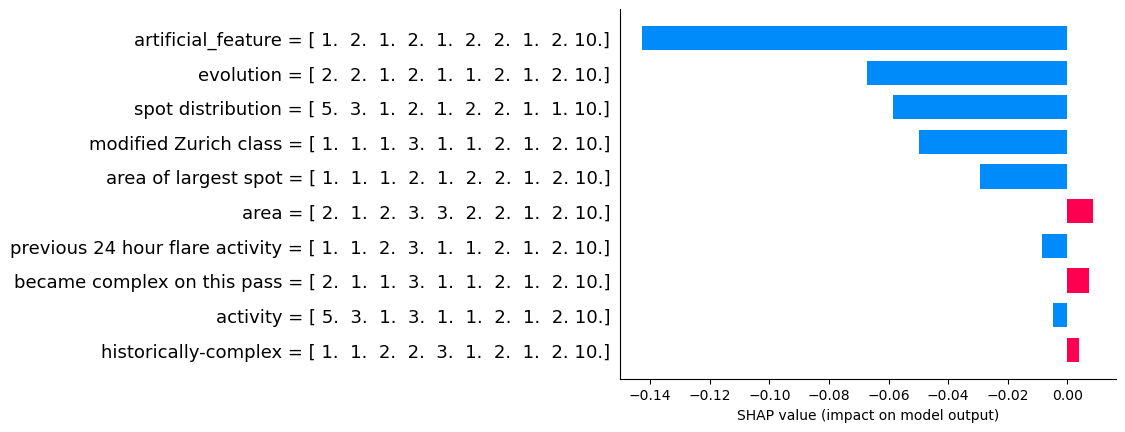

In [39]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
bar_plot(mean_stochastic_shapley_values.T[1], datasets[1], feature_names=feature_names)

artificial feature is the highest contribution towars making this group an outlier.

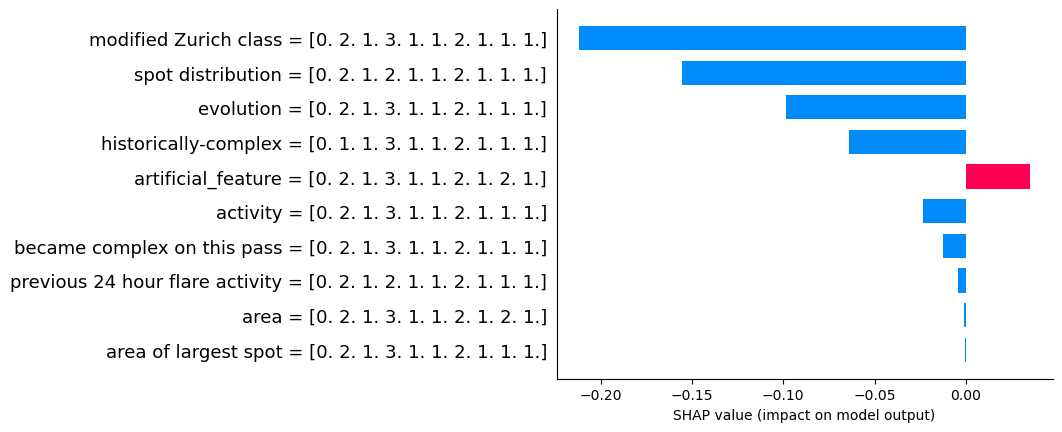

In [40]:
bar_plot(mean_stochastic_shapley_values.T[5], datasets[5], feature_names=feature_names)

For the other outlier, it is caused due to other reasons and not artificial_feature.